In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import display
import openpyxl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier

sns.set_style('whitegrid')

#Loading the data
spotify = pd.read_csv('278k_song_labelled.csv')


#Remove a unique identifier column to check for duplicates
spotify_df = spotify.drop(columns= 'Unnamed: 0')


display(spotify.head())

#Shape of the data
print(f'Number of Columns: {spotify.shape[1]} \nNumber of rows: {spotify.shape[0]}')

#Checking for the data types
print(spotify.dtypes)

#Checking for duplicates
print(spotify_df.duplicated().sum())

#Checking for missing values
print(spotify.isna().sum())

#Statistical Description
print(spotify.describe())



,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


Number of Columns: 13 
Number of rows: 277938
Unnamed: 0            int64
duration (ms)       float64
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
spec_rate           float64
labels                int64
dtype: object
1678
Unnamed: 0          0
duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0
dtype: int64
          Unnamed: 0  duration (ms)   danceability         energy  \
count  277938.000000   2.779380e+05  277938.000000  277938.000000   
mean   138968.500000   2.324961e+05       0.552583       0.556866   
std     80233.933896   1.171830e+05       0.188905       0.279681

### Exploratory Data Analysis

#### Duration Distribution

          Unnamed: 0  duration (ms)   danceability         energy  \
count  277938.000000   2.779380e+05  277938.000000  277938.000000   
mean   138968.500000   2.324961e+05       0.552583       0.556866   
std     80233.933896   1.171830e+05       0.188905       0.279681   
min         0.000000   6.706000e+03       0.000000       0.000000   
25%     69484.250000   1.720130e+05       0.431000       0.342000   
50%    138968.500000   2.131055e+05       0.571000       0.591000   
75%    208452.750000   2.648660e+05       0.693000       0.792000   
max    277937.000000   3.919895e+06       0.989000       1.000000   

            loudness    speechiness   acousticness  instrumentalness  \
count  277938.000000  277938.000000  277938.000000     277938.000000   
mean      -10.363654       0.087913       0.386583          0.255044   
std         6.672049       0.112500       0.364504          0.373745   
min       -60.000000       0.000000       0.000000          0.000000   
25%       -12.7470

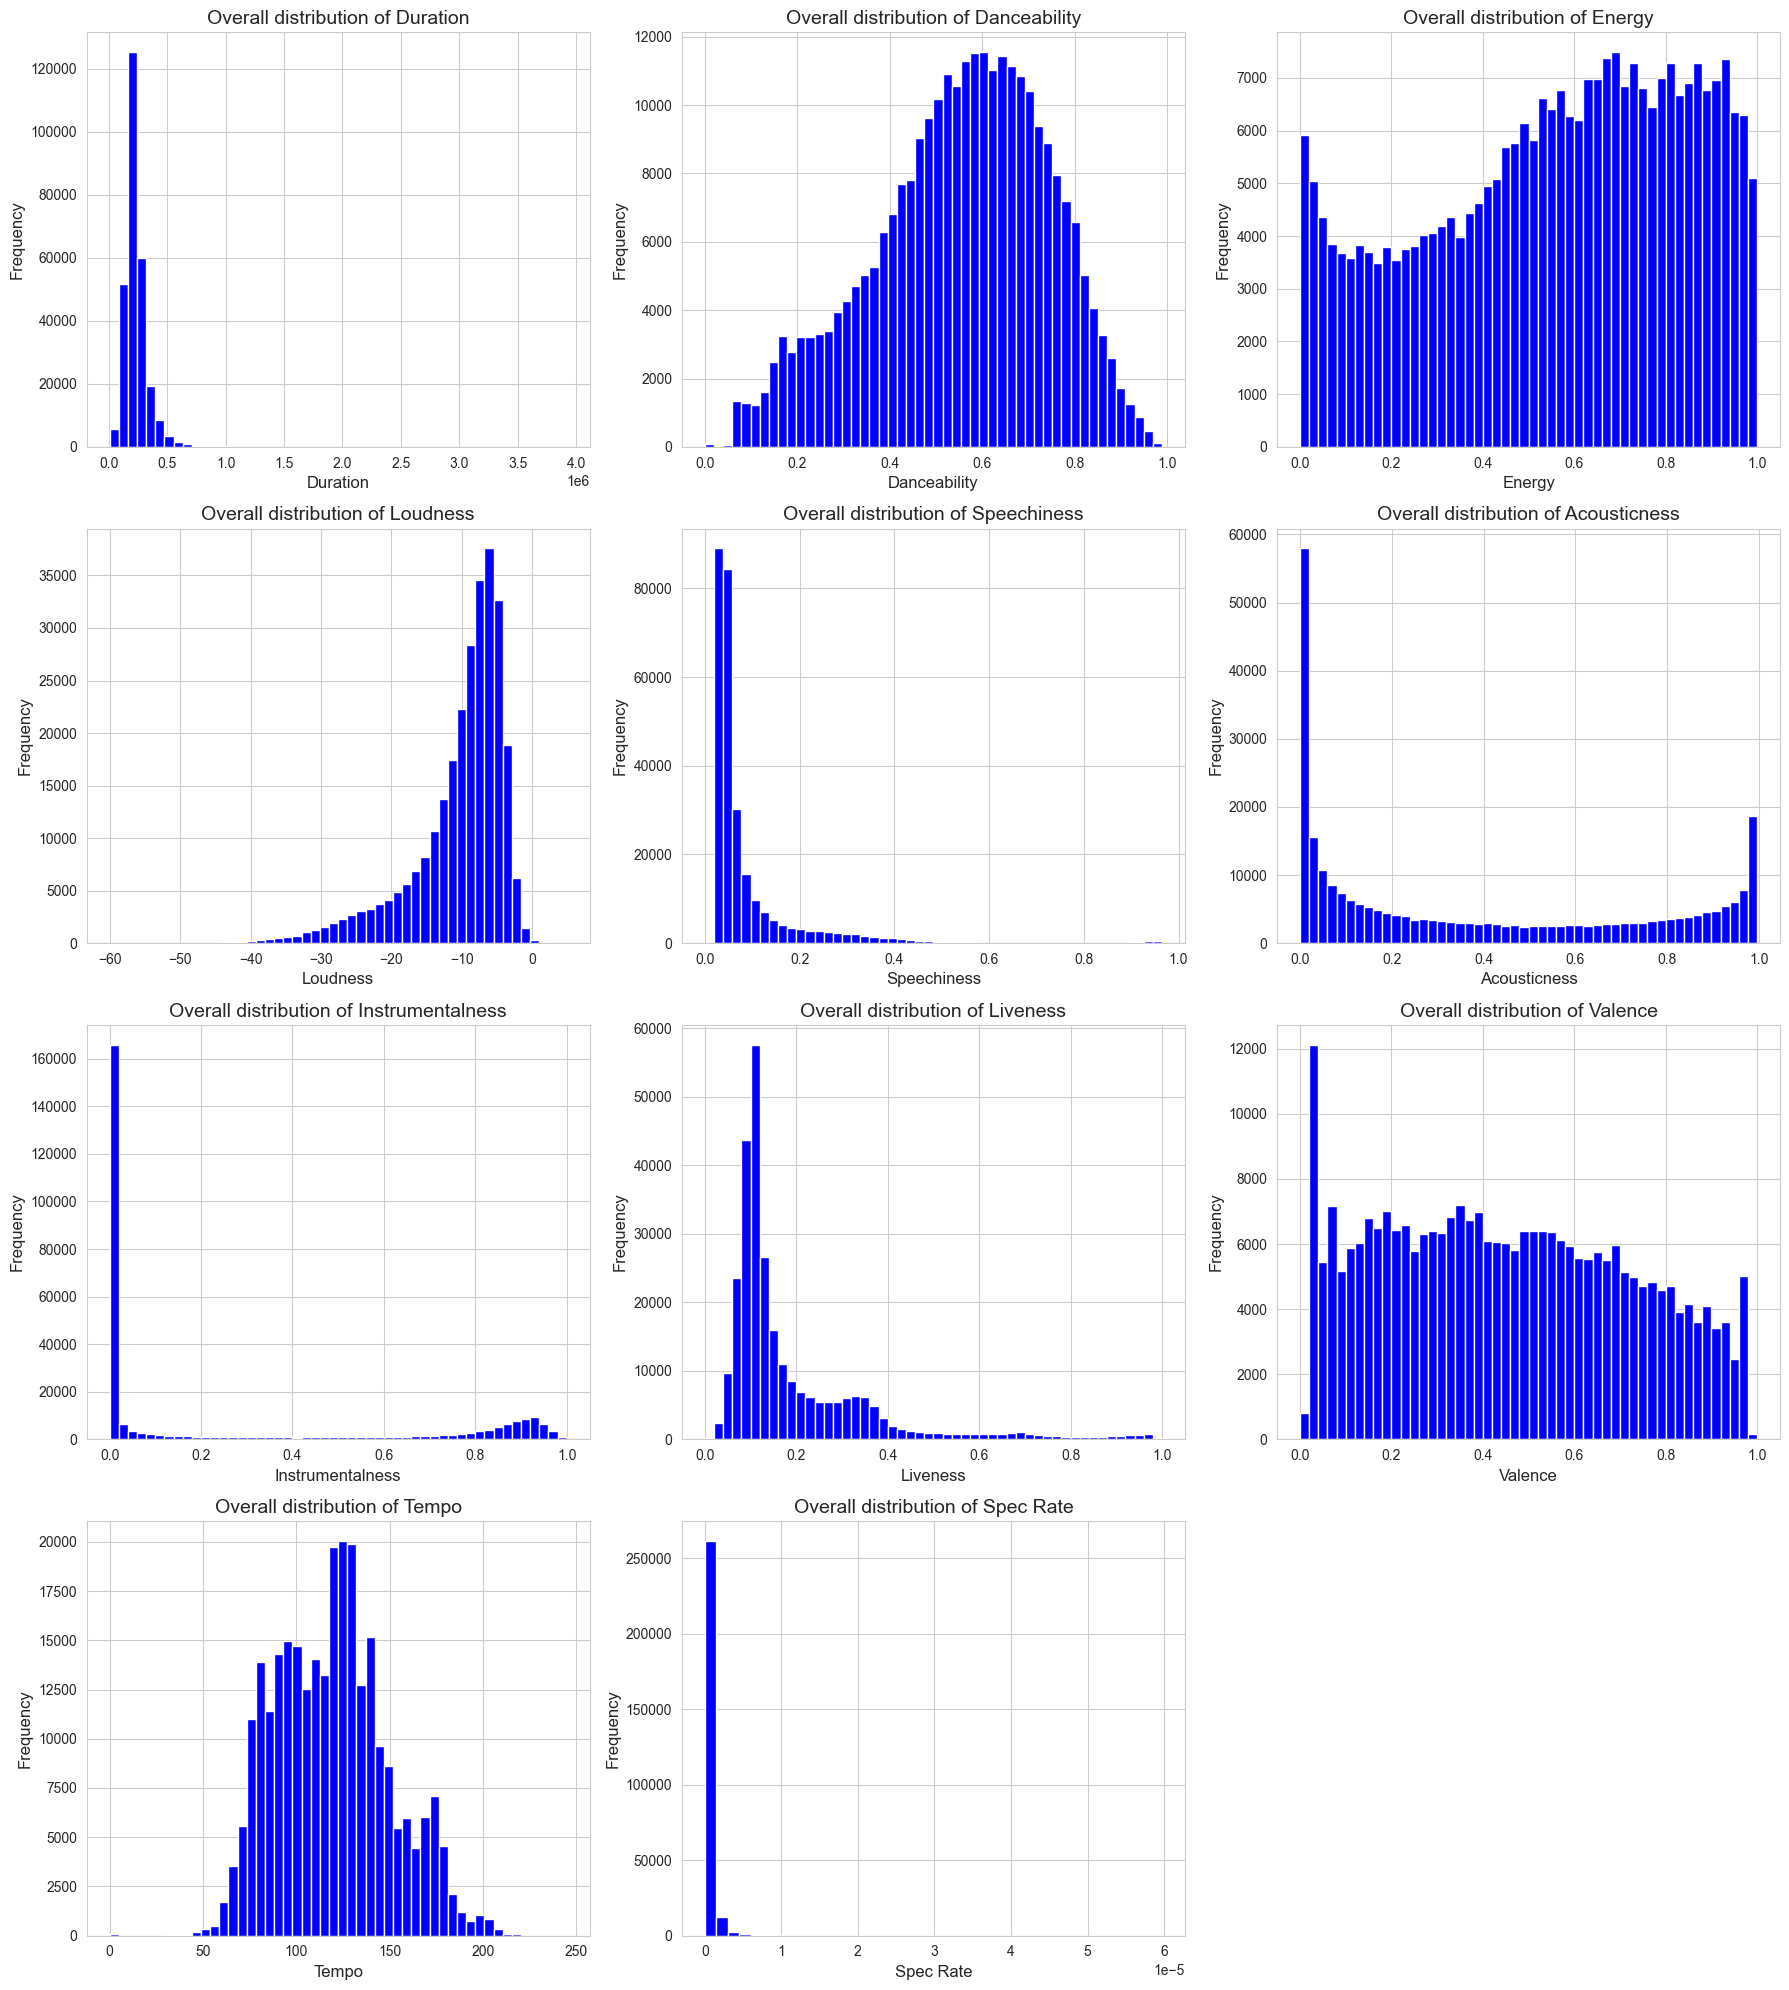

In [26]:
print(spotify.describe())
print(spotify['danceability'].mode())

#Visualising...
fig, ax = plt.subplots(4, 3, figsize = (18, 20))
ax[0, 0].hist(x = 'duration (ms)', data = spotify, bins = 50, color = 'blue')
ax[0, 0].set_title('Overall distribution of Duration', fontsize = 14)
ax[0, 0].set_xlabel('Duration', fontsize = 12)
ax[0, 0].set_ylabel('Frequency', fontsize = 12)

ax[0, 1].hist(x = 'danceability', data = spotify, bins = 50, color = 'blue')
ax[0, 1].set_title('Overall distribution of Danceability', fontsize = 14)
ax[0, 1].set_xlabel('Danceability', fontsize = 12)
ax[0, 1].set_ylabel('Frequency', fontsize = 12)

ax[0, 2].hist(x = 'energy', data = spotify, bins = 50, color = 'blue')
ax[0, 2].set_title('Overall distribution of Energy', fontsize = 14)
ax[0, 2].set_xlabel('Energy', fontsize = 12)
ax[0, 2].set_ylabel('Frequency', fontsize = 12)

ax[1, 0].hist(x = 'loudness', data = spotify, bins = 50, color = 'blue')
ax[1, 0].set_title('Overall distribution of Loudness', fontsize = 14)
ax[1, 0].set_xlabel('Loudness', fontsize = 12)
ax[1, 0].set_ylabel('Frequency', fontsize = 12)

ax[1, 1].hist(x = 'speechiness', data = spotify, bins = 50, color = 'blue')
ax[1, 1].set_title('Overall distribution of Speechiness', fontsize = 14)
ax[1, 1].set_xlabel('Speechiness', fontsize = 12)
ax[1, 1].set_ylabel('Frequency', fontsize = 12)

ax[1, 2].hist(x = 'acousticness', data = spotify, bins = 50, color = 'blue')
ax[1, 2].set_title('Overall distribution of Acousticness', fontsize = 14)
ax[1, 2].set_xlabel('Acousticness', fontsize = 12)
ax[1, 2].set_ylabel('Frequency', fontsize = 12)

ax[2, 0].hist(x = 'instrumentalness', data = spotify, bins = 50, color = 'blue')
ax[2, 0].set_title('Overall distribution of Instrumentalness', fontsize = 14)
ax[2, 0].set_xlabel('Instrumentalness', fontsize = 12)
ax[2, 0].set_ylabel('Frequency', fontsize = 12)

ax[2, 1].hist(x = 'liveness', data = spotify, bins = 50, color = 'blue')
ax[2, 1].set_title('Overall distribution of Liveness', fontsize = 14)
ax[2, 1].set_xlabel('Liveness', fontsize = 12)
ax[2, 1].set_ylabel('Frequency', fontsize = 12)

ax[2, 2].hist(x = 'valence', data = spotify, bins = 50, color = 'blue')
ax[2, 2].set_title('Overall distribution of Valence', fontsize = 14)
ax[2, 2].set_xlabel('Valence', fontsize = 12)
ax[2, 2].set_ylabel('Frequency', fontsize = 12)

ax[3, 0].hist(x = 'tempo', data = spotify, bins = 50, color = 'blue')
ax[3, 0].set_title('Overall distribution of Tempo', fontsize = 14)
ax[3, 0].set_xlabel('Tempo', fontsize = 12)
ax[3, 0].set_ylabel('Frequency', fontsize = 12)

ax[3, 1].hist(x = 'spec_rate', data = spotify, bins = 40, color = 'blue')
ax[3, 1].set_title('Overall distribution of Spec Rate', fontsize = 14)
ax[3, 1].set_xlabel('Spec Rate', fontsize = 12)
ax[3, 1].set_ylabel('Frequency', fontsize = 12)

plt.delaxes(ax[3, 2])
plt.tight_layout()
plt.show()

#### Correlation Analysis

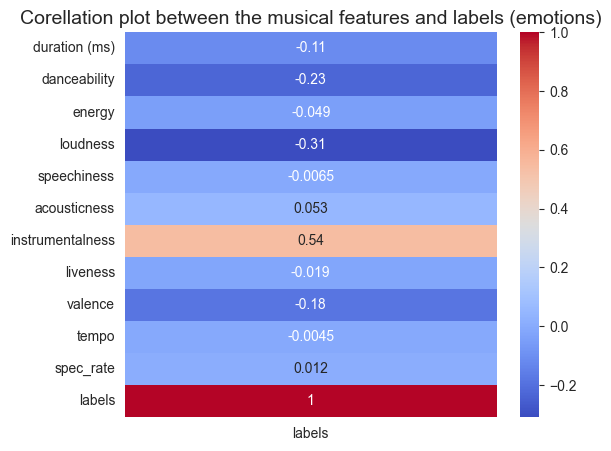

In [27]:

correlate_2 = spotify_df.corr()[['labels']]

plt.figure(figsize = (6, 5))
sns.heatmap(correlate_2, annot=True, cmap = 'coolwarm')
plt.title('Corellation plot between the musical features and labels (emotions)', fontsize = 14)
plt.show()

#### Visualization of feature patterns per label

C:\Users\HomePC\AppData\Local\Temp\ipykernel_3128\3248200528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = ax[0, 0], x = 'labels', y = 'duration (ms)', data = spotify, palette='magma')
C:\Users\HomePC\AppData\Local\Temp\ipykernel_3128\3248200528.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = ax[0, 1], x = 'labels', y = 'danceability', data = spotify, palette='magma')
C:\Users\HomePC\AppData\Local\Temp\ipykernel_3128\3248200528.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax = ax[0, 2], x = 'labels', y = 'energy',

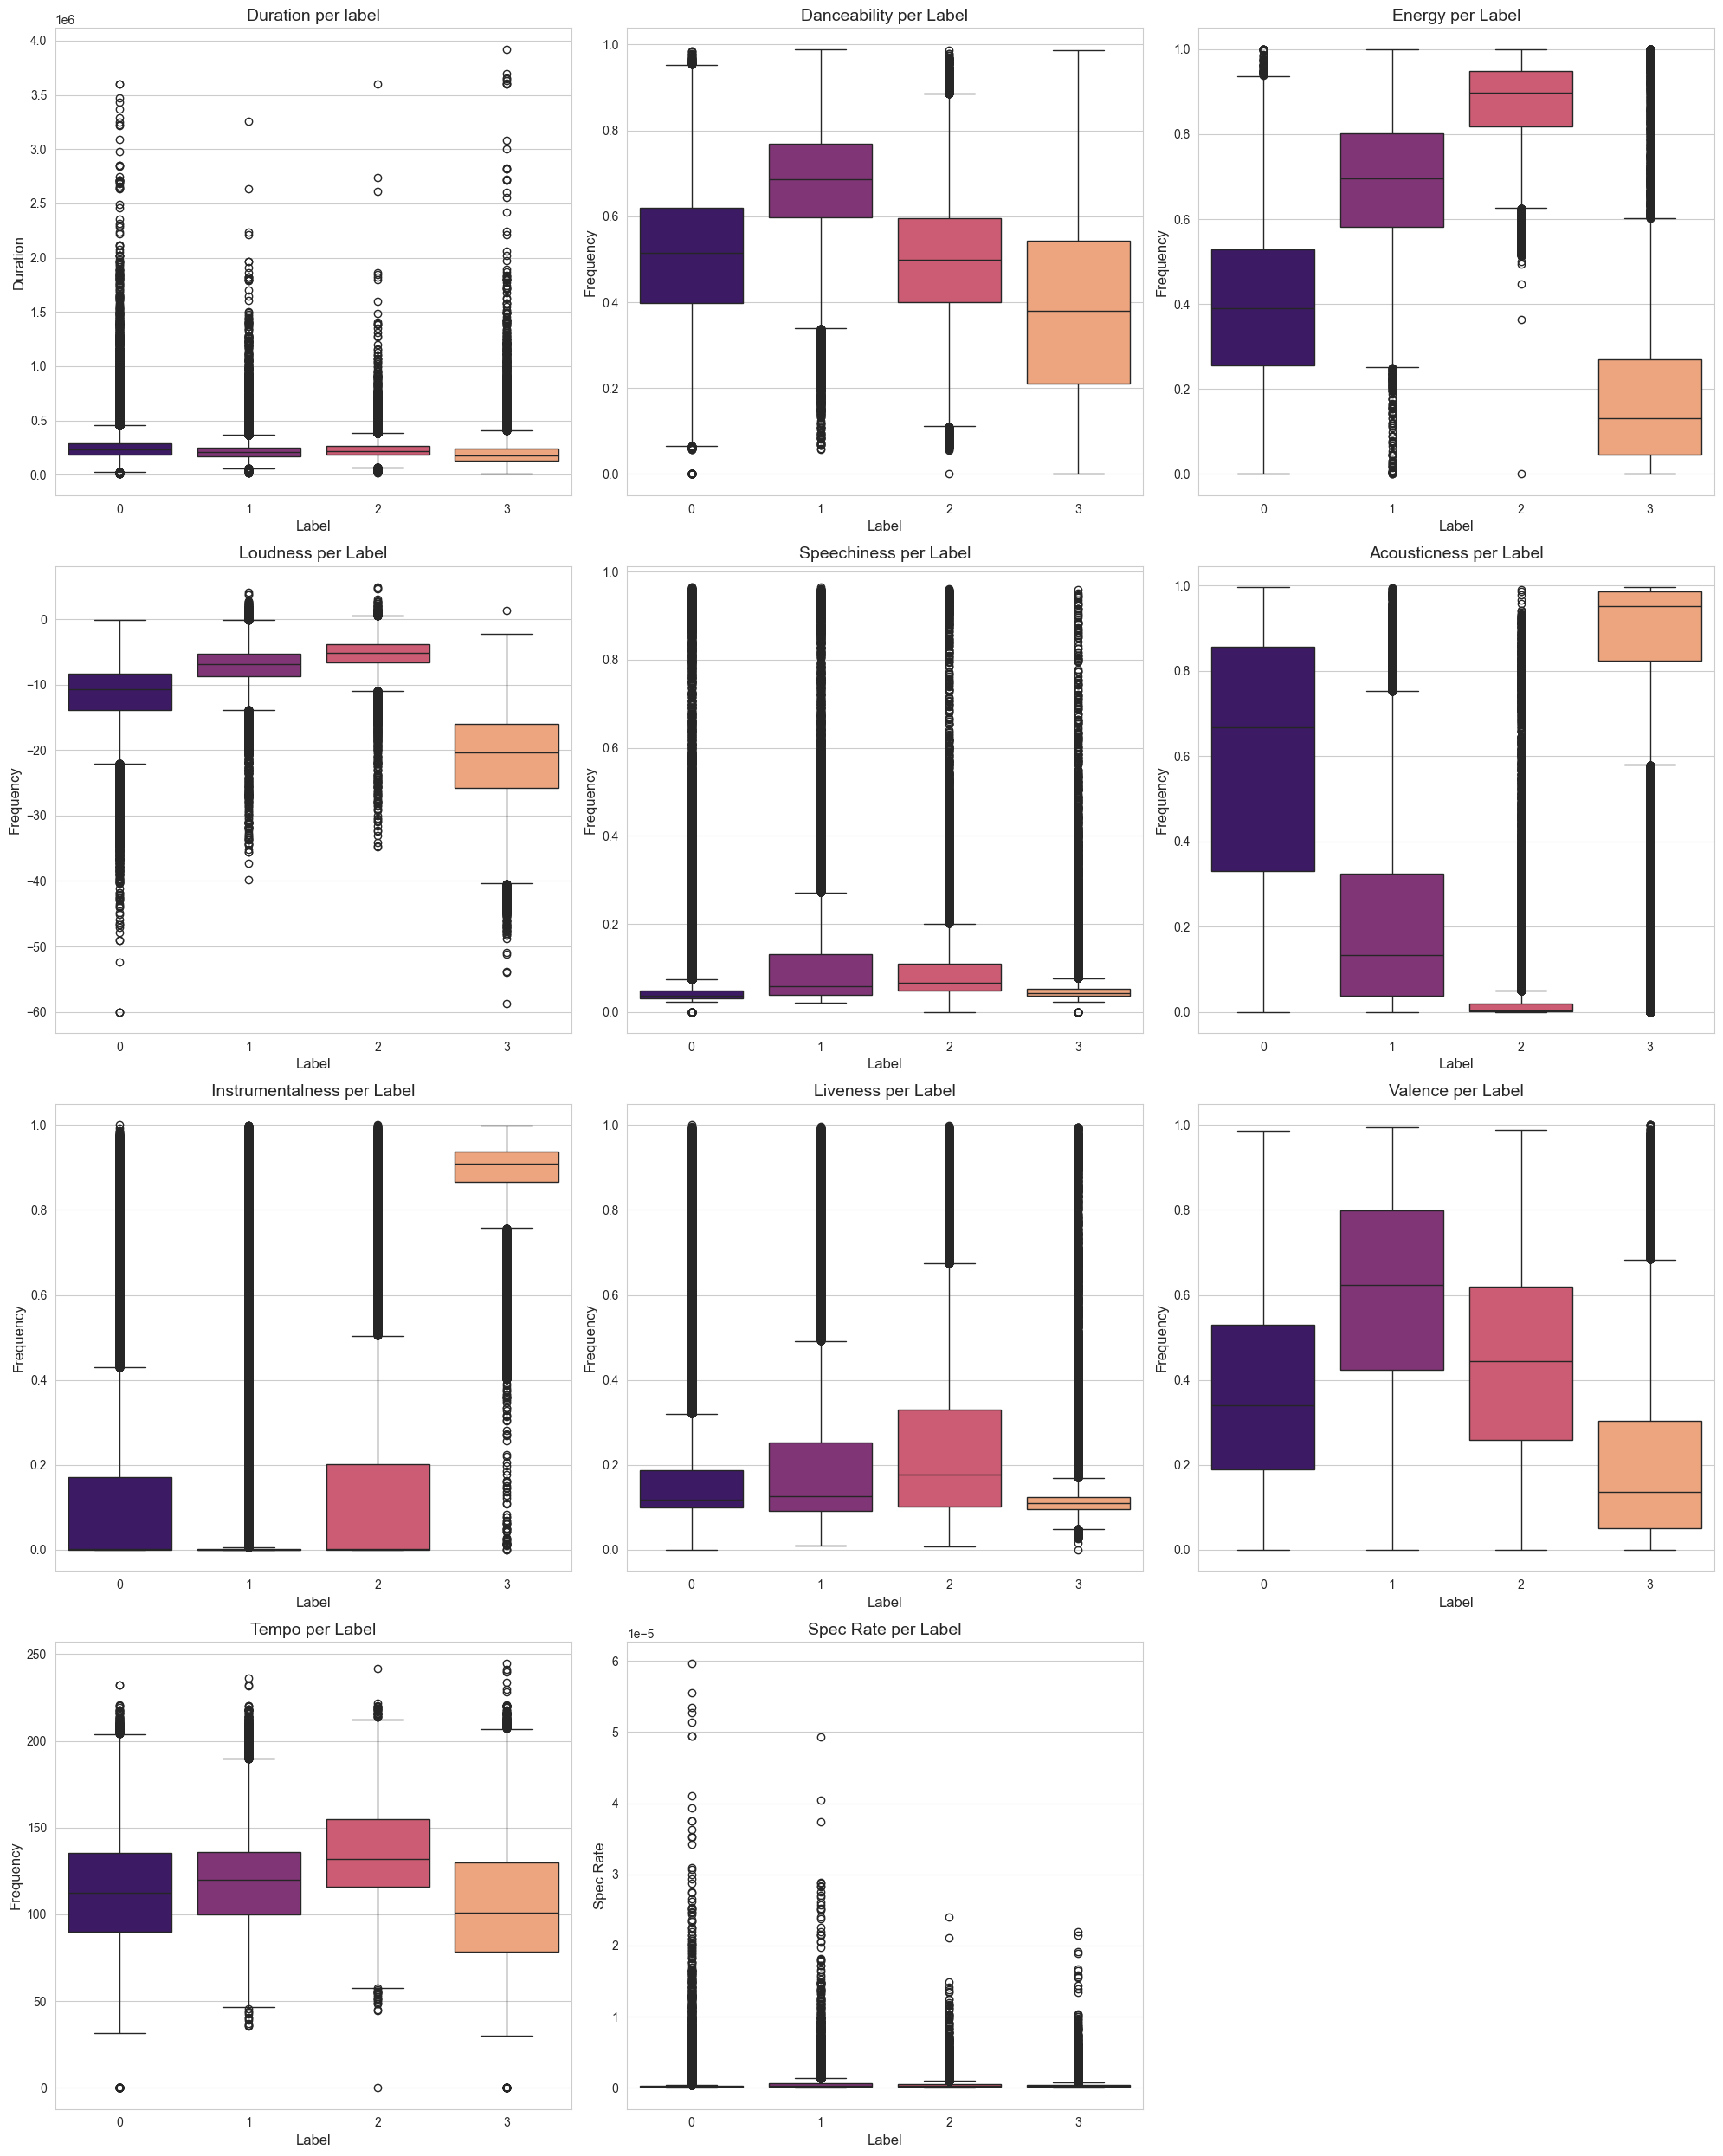

In [28]:
fig, ax = plt.subplots(4, 3, figsize = (20, 25))
sns.boxplot(ax = ax[0, 0], x = 'labels', y = 'duration (ms)', data = spotify, palette='magma')
ax[0, 0].set_title('Duration per label', fontsize = 14)
ax[0, 0].set_xlabel('Label', fontsize = 12)
ax[0, 0].set_ylabel('Duration', fontsize = 12)

sns.boxplot(ax = ax[0, 1], x = 'labels', y = 'danceability', data = spotify, palette='magma')
ax[0, 1].set_title('Danceability per Label', fontsize = 14)
ax[0, 1].set_xlabel('Label', fontsize = 12)
ax[0, 1].set_ylabel('Frequency', fontsize = 12)

sns.boxplot(ax = ax[0, 2], x = 'labels', y = 'energy', data = spotify, palette = 'magma')
ax[0, 2].set_title('Energy per Label', fontsize = 14)
ax[0, 2].set_xlabel('Label', fontsize = 12)
ax[0, 2].set_ylabel('Frequency', fontsize = 12)

sns.boxplot(ax = ax[1, 0], x = 'labels', y= 'loudness', data = spotify, palette = 'magma')
ax[1, 0].set_title('Loudness per Label', fontsize = 14)
ax[1, 0].set_xlabel('Label', fontsize = 12)
ax[1, 0].set_ylabel('Frequency', fontsize = 12)

sns.boxplot(ax = ax[1, 1], x = 'labels', y = 'speechiness', data = spotify, palette = 'magma')
ax[1, 1].set_title('Speechiness per Label', fontsize = 14)
ax[1, 1].set_xlabel('Label', fontsize = 12)
ax[1, 1].set_ylabel('Frequency', fontsize = 12)

sns.boxplot(ax = ax[1, 2], x = 'labels', y = 'acousticness', data = spotify, palette = 'magma')
ax[1, 2].set_title('Acousticness per Label', fontsize = 14)
ax[1, 2].set_xlabel('Label', fontsize = 12)
ax[1, 2].set_ylabel('Frequency', fontsize = 12)

sns.boxplot(ax = ax[2, 0], x = 'labels', y = 'instrumentalness', data = spotify, palette = 'magma')
ax[2, 0].set_title('Instrumentalness per Label', fontsize = 14)
ax[2, 0].set_xlabel('Label', fontsize = 12)
ax[2, 0].set_ylabel('Frequency', fontsize = 12)

sns.boxplot(ax = ax[2, 1], x = 'labels', y = 'liveness', data = spotify, palette = 'magma')
ax[2, 1].set_title('Liveness per Label', fontsize = 14)
ax[2, 1].set_xlabel('Label', fontsize = 12)
ax[2, 1].set_ylabel('Frequency', fontsize = 12)

sns.boxplot(ax = ax[2, 2], x = 'labels', y = 'valence', data = spotify, palette= 'magma')
ax[2, 2].set_title('Valence per Label', fontsize = 14)
ax[2, 2].set_xlabel('Label', fontsize = 12)
ax[2, 2].set_ylabel('Frequency', fontsize = 12)

sns.boxplot(ax = ax[3, 0], x = 'labels', y = 'tempo', data = spotify, palette = 'magma')
ax[3, 0].set_title('Tempo per Label', fontsize = 14)
ax[3, 0].set_xlabel('Label', fontsize = 12)
ax[3, 0].set_ylabel('Frequency', fontsize = 12)

sns.boxplot(ax = ax[3, 1], x = 'labels', y = 'spec_rate', data = spotify, palette = 'magma')
ax[3, 1].set_title('Spec Rate per Label', fontsize = 14)
ax[3, 1].set_xlabel('Label', fontsize = 12)
ax[3, 1].set_ylabel('Spec Rate', fontsize = 12)

plt.delaxes(ax[3, 2])
plt.tight_layout()
plt.show()

#### Class Imbalance

In [29]:
count_1, count_2, count_3, count_4 = spotify_df['labels'].value_counts()
print(count_1, count_2, count_3, count_4)
print(spotify_df['labels'].value_counts())

most_count_1 = spotify[spotify['labels']== 1]
sec_most_count_0 = spotify[spotify['labels']== 0]
third_most_2 = spotify[spotify['labels']== 2]
least_count_3 = spotify[spotify['labels']== 3]

sec_most_oversamp = sec_most_count_0.sample(len(most_count_1), replace=True, random_state=42)
third_most_oversamp = third_most_2.sample(len(most_count_1), replace=True, random_state=42)
least_most_oversamp = least_count_3.sample(len(most_count_1), replace=True, random_state=42)

new_balanced = pd.concat([most_count_1, sec_most_oversamp, third_most_oversamp, least_most_oversamp])

print(new_balanced['labels'].value_counts())


106429 82058 47065 42386
labels
1    106429
0     82058
2     47065
3     42386
Name: count, dtype: int64
labels
1    106429
0    106429
2    106429
3    106429
Name: count, dtype: int64


#### No missing values
#### The features are encoded already!!!

#### Data Preprocessing

In [48]:
X = new_balanced.drop(['Unnamed: 0', 'labels'], axis=1)
y = new_balanced['labels']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Model Training

In [49]:
lr = LogisticRegression(max_iter = 1000)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = LinearSVC(max_iter=1000, dual = False)
lgbm = LGBMClassifier()

classifiers = [('Logistic Regression', lr), ('Decision Tree', dt), ('Random Forest', rf), ('Support Vector', svm), ('LightGBM', lgbm)]


for name, model in classifiers:
    print(name)
    model.fit(X_train_scaled, y_train)
    print(f'{name} Trained successfully')
    print('\n')



Logistic Regression
Logistic Regression Trained successfully


Decision Tree


KeyboardInterrupt: 

#### Model Evaluation

##### Accuracy score

In [ ]:
results_acc = []
print('Accuracy Score for each model')
for name, model in classifiers:
    y_pred = model.predict(X_test_scaled)
    accu = accuracy_score(y_test, y_pred)
    results_acc.append(accu)
    print(f'{name}: {accu}:.4f')
    

Accuracy Score for each model
Logistic Regression: 0.8467302452316077:.4f
Decision Tree: 0.9599384572019167:.4f
Random Forest: 0.9752771774875505:.4f
Support Vector: 0.8165460866297096:.4f


c:\Users\HomePC\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM: 0.9673141971248708:.4f


##### F1 score

In [ ]:
results_f1 = []
print('F1 Score for each model')
for name, model in classifiers:
    y_pred = model.predict(X_test_scaled)
    f1 = recall_score(y_test, y_pred, average='weighted')
    results_f1.append(f1)
    print(f'{name}: {f1:.4f}')

F1 Score for each model
Logistic Regression: 0.8467
Decision Tree: 0.9599
Random Forest: 0.9753
Support Vector: 0.8165


c:\Users\HomePC\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM: 0.9673


##### Recall score

In [ ]:
results_rec = []
print('Recall Score for each model')
for name, model in classifiers:
    y_pred = model.predict(X_test_scaled)
    rec = recall_score(y_test, y_pred, average='weighted')
    results_rec.append(rec)
    print(f'{name}: {rec:.4f}')

Recall Score for each model
Logistic Regression: 0.8467
Decision Tree: 0.9599
Random Forest: 0.9753
Support Vector: 0.8165


c:\Users\HomePC\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM: 0.9673


##### Precision score

In [ ]:
results_prec = []
print('Precision Score for each model')
for name, model in classifiers:
    y_pred = model.predict(X_test_scaled)
    prec = precision_score(y_test, y_pred, average='weighted')
    results_prec.append(prec)
    print(f'{name}: {prec:.4f}')

Precision Score for each model
Logistic Regression: 0.8457
Decision Tree: 0.9600
Random Forest: 0.9753
Support Vector: 0.8141


c:\Users\HomePC\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM: 0.9673


##### Confusion Matrix

Confusion Matrix for each model
Logistic Regression


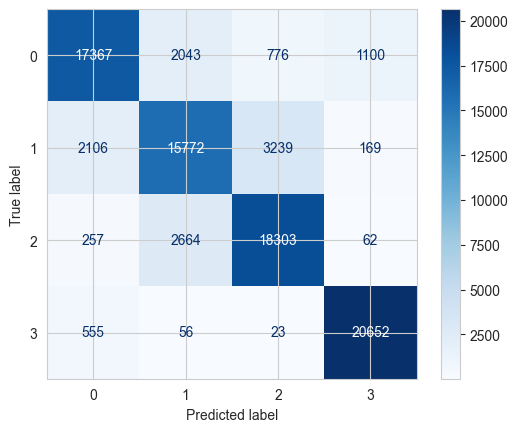

Decision Tree


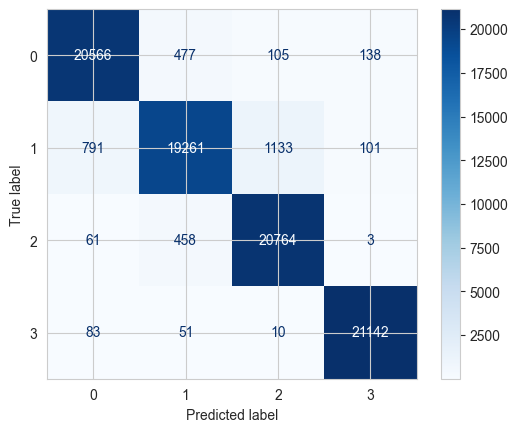

Random Forest


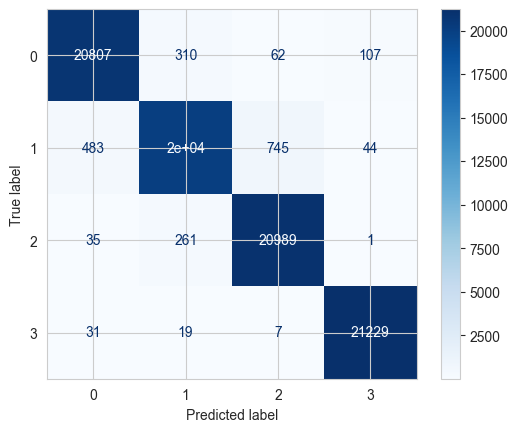

Support Vector


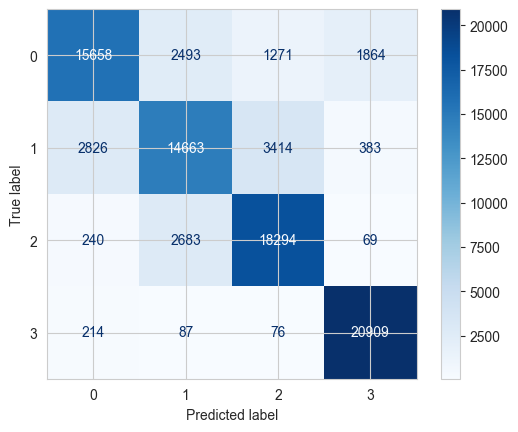

c:\Users\HomePC\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM


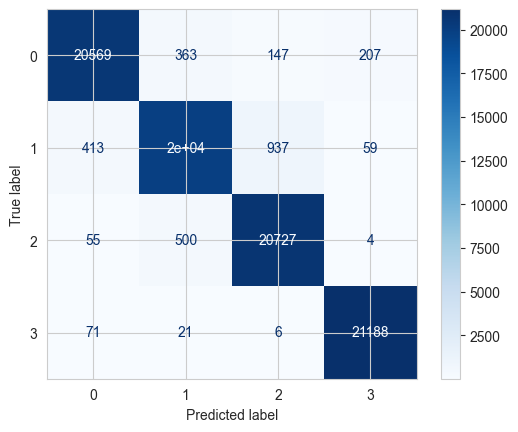

In [ ]:
print('Confusion Matrix for each model')
for name, model in classifiers:
    y_pred = model.predict(X_test_scaled)
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap=plt.cm.Blues, colorbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

##### ROC-AUC

In [ ]:
results_ROC = []
for name, model in classifiers:
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_scaled)
        roc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        results_ROC.append(roc_score)
        print(name)
        print(roc_score)
    else:
        print(name)
        print(None)
        results_ROC.append(None)
     

Logistic Regression
0.9696902119651476
Decision Tree
0.9732923048012778
Random Forest
0.9990909350073437
Support Vector
None


c:\Users\HomePC\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM
0.998466397194574


#### Cross Validation

In [53]:
result_mean_cv = []
results_std_cv = []
for name, model in classifiers:
    scv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv = scv, scoring='accuracy')
    mean_cv = np.mean(cv_results)
    std_cv = np.std(cv_results)
    result_mean_cv.append(mean_cv)
    results_std_cv.append(std_cv)
    print(mean_cv)



0.8469838954630149
0.9530525119734252
0.9712601134716549
0.8174218662840739
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2802
[LightGBM] [Info] Number of data points in the train set: 272457, number of used features: 11
[LightGBM] [Info] Start training from score -1.386298
[LightGBM] [Info] Start training from score -1.386298
[LightGBM] [Info] Start training from score -1.386283
[LightGBM] [Info] Start training from score -1.386298


c:\Users\HomePC\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2802
[LightGBM] [Info] Number of data points in the train set: 272457, number of used features: 11
[LightGBM] [Info] Start training from score -1.386283
[LightGBM] [Info] Start training from score -1.386298
[LightGBM] [Info] Start training from score -1.386298
[LightGBM] [Info] Start training from score -1.386298


c:\Users\HomePC\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2802
[LightGBM] [Info] Number of data points in the train set: 272458, number of used features: 11
[LightGBM] [Info] Start training from score -1.386287
[LightGBM] [Info] Start training from score -1.386302
[LightGBM] [Info] Start training from score -1.386302
[LightGBM] [Info] Start training from score -1.386287


c:\Users\HomePC\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022767 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2803
[LightGBM] [Info] Number of data points in the train set: 272458, number of used features: 11
[LightGBM] [Info] Start training from score -1.386302
[LightGBM] [Info] Start training from score -1.386287
[LightGBM] [Info] Start training from score -1.386302
[LightGBM] [Info] Start training from score -1.386287


c:\Users\HomePC\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2802
[LightGBM] [Info] Number of data points in the train set: 272458, number of used features: 11
[LightGBM] [Info] Start training from score -1.386302
[LightGBM] [Info] Start training from score -1.386287
[LightGBM] [Info] Start training from score -1.386287
[LightGBM] [Info] Start training from score -1.386302


c:\Users\HomePC\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.9674136452257043


In [54]:
names = []
for name, model in classifiers:
    names.append(name)
    
results_dict = {'Model Name': names, 'Accuracy Score': results_acc, 'F1 Score': results_f1, 'Recall Score': results_rec, 'Recall Score': results_prec, 'ROC-AUC Score': results_ROC, 'Mean CV': result_mean_cv, 'S.D CV': results_std_cv}

results_models = pd.DataFrame(results_dict)

display(results_models)



,Model Name,Accuracy Score,F1 Score,Recall Score,ROC-AUC Score,Mean CV,S.D CV
0,Logistic Regression,0.846730,0.846730,0.845728,0.969690,0.846984,0.000955
1,Decision Tree,0.959938,0.959938,0.959950,0.973292,0.953053,0.000495
2,Random Forest,0.975277,0.975277,0.975304,0.999091,0.971260,0.000757
3,Support Vector,0.816546,0.816546,0.814112,NaN,0.817422,0.001019
4,LightGBM,0.967314,0.967314,0.967335,0.998466,0.967414,0.000379


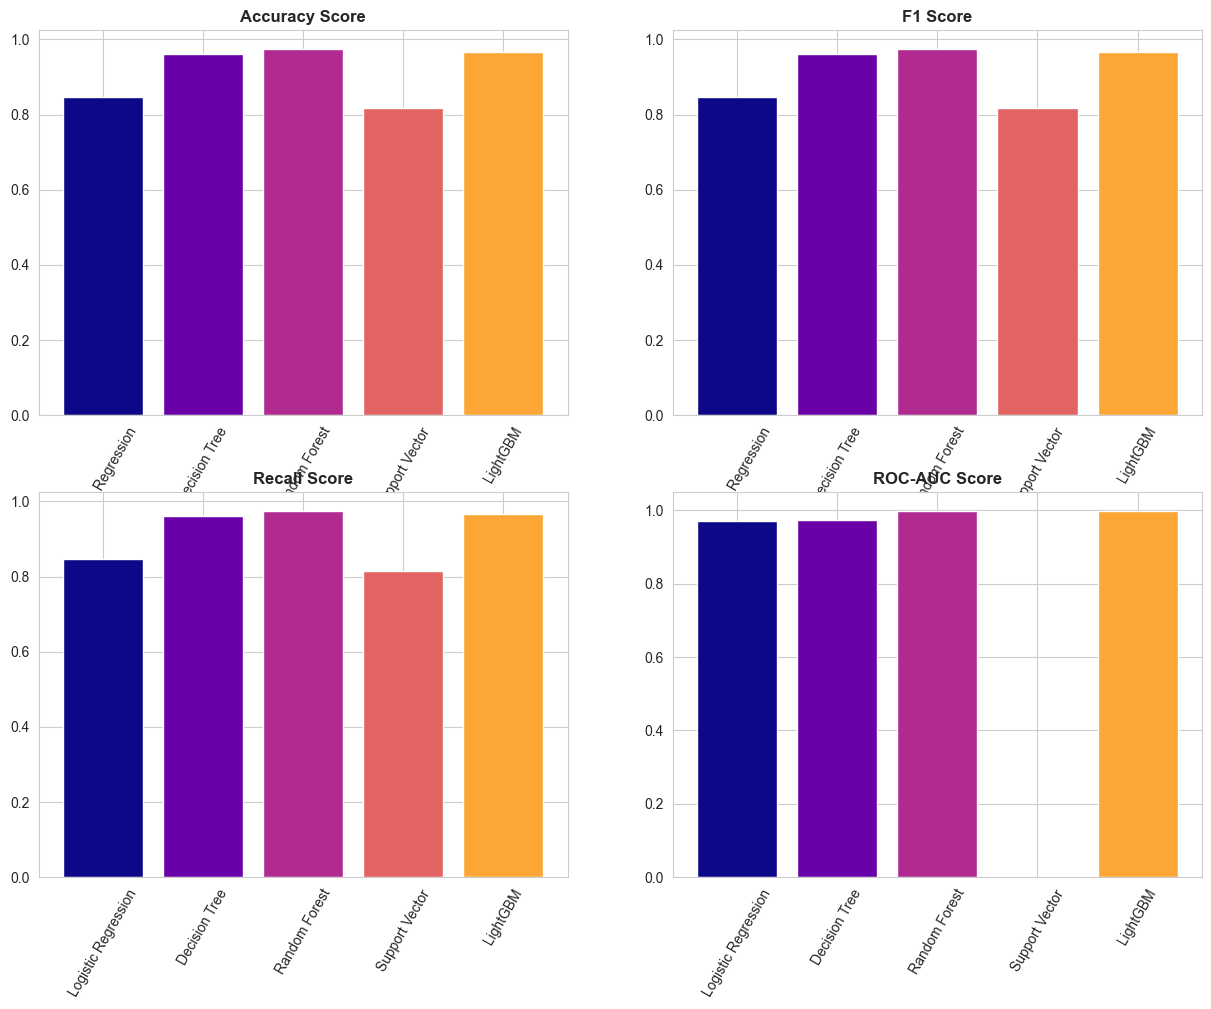

In [77]:
fig, ax = plt.subplots(2, 2, figsize=(15, 11))
ax[0, 0].bar(x = results_models['Model Name'], height = results_models['Accuracy Score'], color = plt.cm.plasma(np.linspace(0, 1, 6)))
ax[0, 0].tick_params(axis = 'x', rotation = 60)
ax[0, 0].set_title('Accuracy Score', fontweight = 'bold' )

ax[0, 1].bar(x = results_models['Model Name'], height = results_models['F1 Score'], color = plt.cm.plasma(np.linspace(0, 1, 6)))
ax[0, 1].tick_params(axis = 'x', rotation = 60)
ax[0, 1].set_title('F1 Score', fontweight = 'bold')

ax[1, 0].bar(x = results_models['Model Name'], height = results_models['Recall Score'], color = plt.cm.plasma(np.linspace(0, 1, 6)))
ax[1, 0].tick_params(axis = 'x', rotation = 60)
ax[1, 0].set_title('Recall Score', fontweight = 'bold')

ax[1, 1].bar(x = results_models['Model Name'], height = results_models['ROC-AUC Score'], color = plt.cm.plasma(np.linspace(0, 1, 6)))
ax[1, 1].tick_params(axis = 'x', rotation = 60)
ax[1, 1].set_title('ROC-AUC Score', fontweight = 'bold')
plt.show()